In [3]:
import random
import dotenv
import pathlib
import os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch

random.seed(2024)
dotenv.load_dotenv(override=True)

HOME_DIR = os.getenv("HOME_DIR")

from ctd.task_modeling.task_env.multitask import MultiTask
from ctd.comparison.analysis.tt.tasks.tt_MultiTask import Analysis_TT_MultiTask


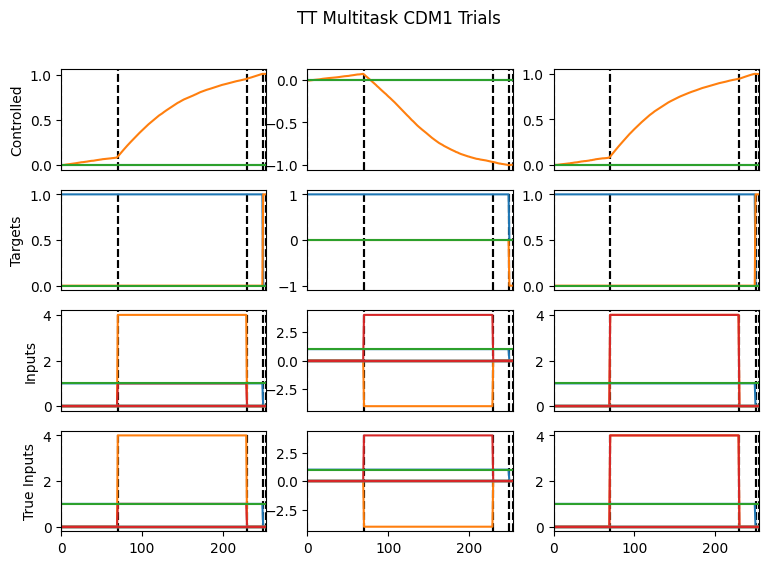

In [6]:
# Node latent size 2

# Latent 2
path = "/scratch/gpfs/ad2002/content/trained_models/task-trained/20240726_NODE_MultiTask_CDM12_simple_300epoch/latent_size=2 weight_decay=1e-09 learning_rate=0.001 max_epochs=300 log_every_n_steps=8 batch_size=250 n_samples=2000 num_workers=5 task_list=['CDM1', 'CDM2'] dataset_name=CDM1CDM2 noise=0.05 loss_func=SimpleMultiTaskLoss bin_size=5 /"
node2 = Analysis_TT_MultiTask(run_name = "node_latent_2", filepath = path)

node2.plot_task_trial(task= "CDM1", num_trials=3)


# you need to figure out the real rank of this

In [18]:
# print what the initial conditions and inputs look like to plot exactly the right trajectories

tt_ics, tt_inputs, tt_targets  = node2.get_model_inputs_noiseless(phase="all")  # phases can be all/train/val
print('shape of initial conditions: ', np.shape(tt_ics))
print(np.sum(np.where(tt_ics==1)))
print('\n shape of inputs: ', np.shape(tt_inputs))
print(tt_inputs[10,1,:])

shape of initial conditions:  torch.Size([1000, 3])
0

 shape of inputs:  torch.Size([1000, 320, 24])
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.])


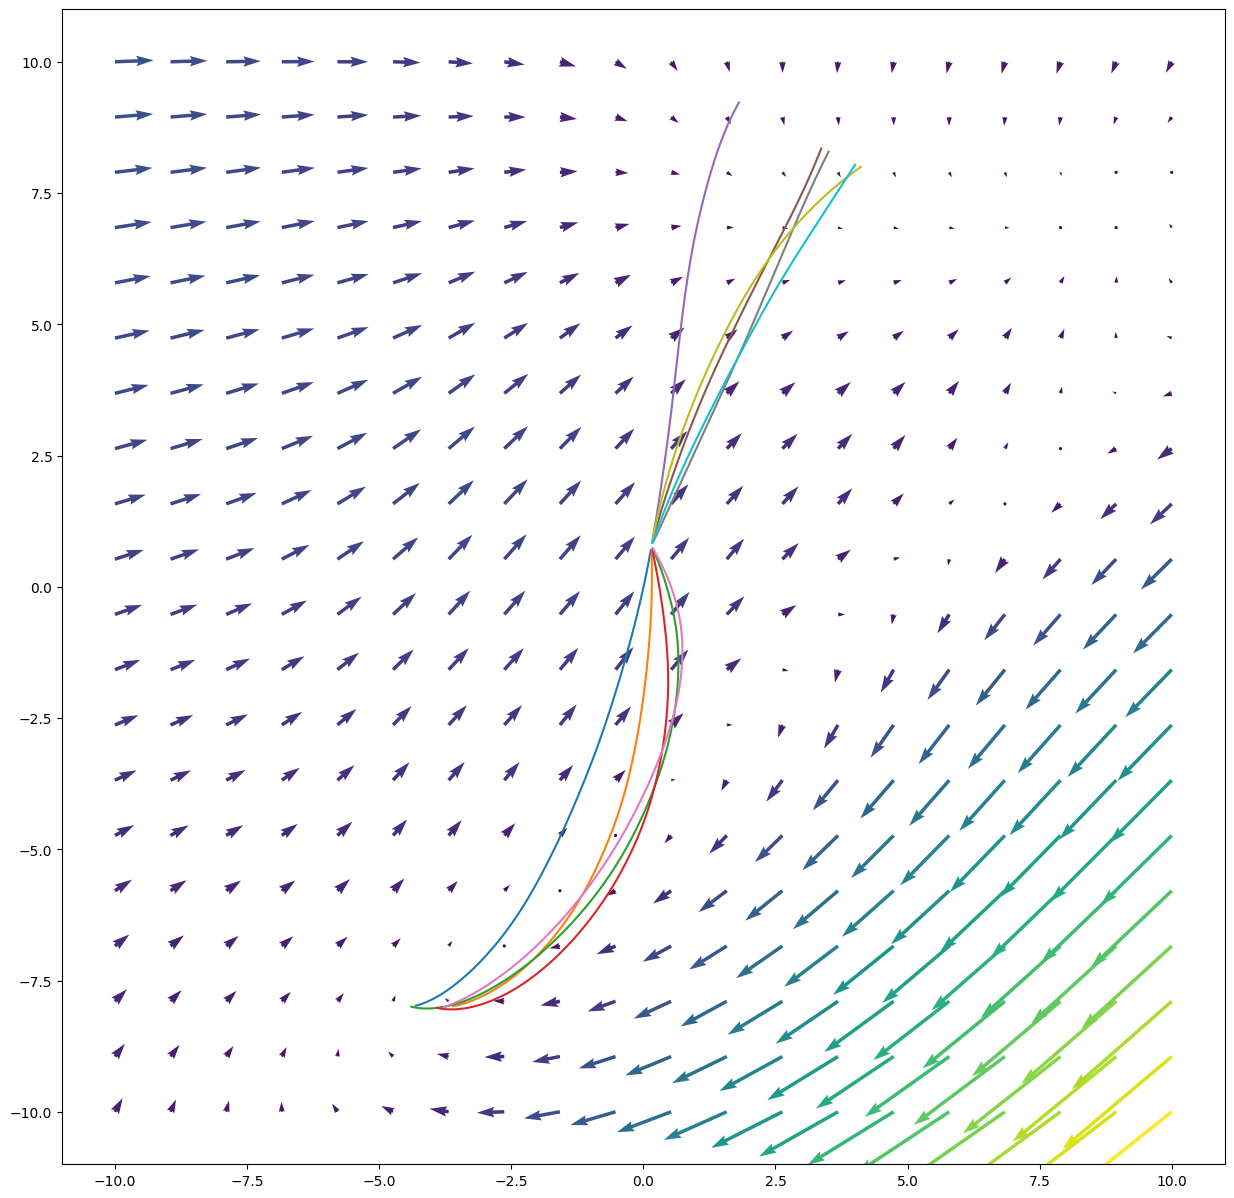

In [8]:
# now plot purely the phase space, without the output

# NOTE: all initial conditions at zero

null_inputs = torch.zeros((1,24), dtype=torch.float)

null_inputs[0][0] = 1  # -> 1 for everything before the response

# channel 1
null_inputs[0][1] = 4   # - sin(x)  -> relevant magnitude
# null_inputs[0][2] = 0   - cos(x)  -> stays zero always

# channel 2
null_inputs[0][3] = 0   #- sin(x)  -> relevant magnitude
# null_inputs[0][4] = 0   #- cos(x)  -> stays zero always

node2.plot_flow_field("CDM1", [[-10,10], [-10, 10]], phases=["stim1"],
                        num_points=20, num_trials=10, use_null_inputs=null_inputs)

# plot with different inputs - plot by evidence strength
# and other inputs that were used to train
# construct the input vectors to keep the flag - but still don't let all the real inputs to be zero 
# the endpoints (memory) points are the most interesting - which stimuli favor each side more strongly

# plot the trajs on top

# notice where the arrows go from the origin for each input - bias towards positive attractor

# check why the latents don't start exactly at the origin
# run trajs for each phase for longer - check carefully what the change in input signals change in phase 

# simple check for fixed point finder: just run the latents forward - mark the timepoint 160, and then for
# timepoints later on

In [ ]:
# LR rank 2